# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

## Outline

Borrowing ideas from the test of normality notebook provided, I am using the Quantile-Quantile plots of the log returns and using D'Agostino and Pearson’s test to examine whether the returns follow a normal distribution or not.

In [1]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import yfinance as yf
import datetime as dt

sns.set_style('darkgrid')

## 1. Normality test for log-return distributions in different years

To test whether there are any particular periods in history where the log-returns are normally distributed, I have looked the returns of S&P 500 data for each year from 2000 to 2024. Using the D'Agostino and Pearson’s test, p values are computed to test if the distribution follows normal distribution. 

In [69]:
# Function to download the log-returns data for S&P 500 for a specified year
def SP500_dat(year, intr):
    start_date = f"{year}-01-01"
    end_date  = f"{year}-12-31"
    SP_index = yf.download('^GSPC', start = start_date , end = end_date, interval=intr,auto_adjust=True)
    SP_returns = SP_index['Close']/SP_index['Close'].shift(1)
    SP_logreturns = np.log(SP_returns.dropna())['^GSPC'].values
    return(SP_logreturns)

In [70]:
# Examine daily returns over the one year periods in years 2000 to 2024
years = range(2000, 2025)
p_values = []

for yr in years:
    SP500_logreturns = SP500_dat(yr,"1d")
    # p value from D'Agostino and Pearson’s tes
    p_sp = stats.normaltest(SP500_logreturns)[1]
    p_values.append(p_sp)
    
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

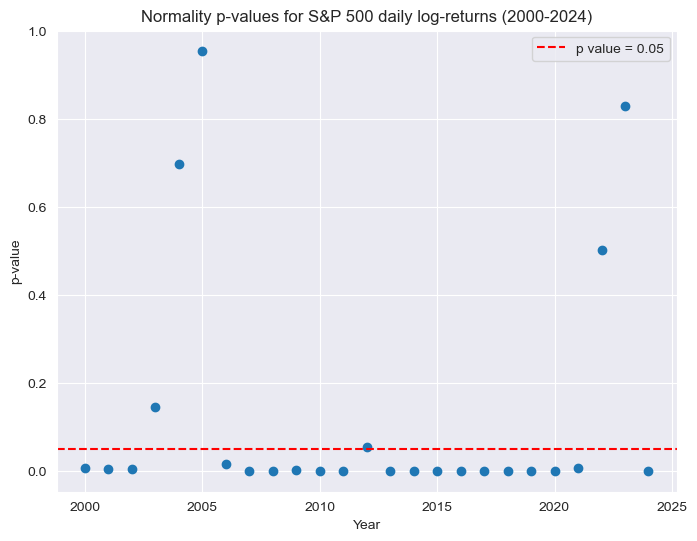

In [71]:

fig, ax = plt.subplots(figsize=(8, 6))   

ax.scatter(years, p_values)
ax.axhline(y=0.05, linestyle="--", color="red",label="p value = 0.05")

ax.set_xlabel("Year")
ax.set_ylabel("p-value")
ax.set_title("Normality p-values for S&P 500 daily log-returns (2000-2024)")
plt.legend()
plt.show()


In [72]:
print("Years where the log returns are normally distributed are")
for i in range(0,25):
    if p_values[i] > 0.05:
        print(years[i])
        

Years where the log returns are normally distributed are
2003
2004
2005
2012
2022
2023


## 2 Effect of extreme values

To understand the nature of deviation from normal distribution, I have examined data of 4 particular years - 2002, 20013, 2015 and 2020. The rationale for choosing these years and the observational remarks are explained later.

In [73]:
# Download data for years 2002, 2013, 2015, 2020 and calculate p values
SP_logreturns_2002 = SP500_dat(2002, "1d")
SP_logreturns_2013 = SP500_dat(2013, "1d")
SP_logreturns_2015 = SP500_dat(2015, "1d")
SP_logreturns_2020 = SP500_dat(2020, "1d")

p_2002 = stats.normaltest(SP_logreturns_2002)[1]
p_2013 = stats.normaltest(SP_logreturns_2013)[1]
p_2015 = stats.normaltest(SP_logreturns_2015)[1]
p_2020 = stats.normaltest(SP_logreturns_2020)[1]



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


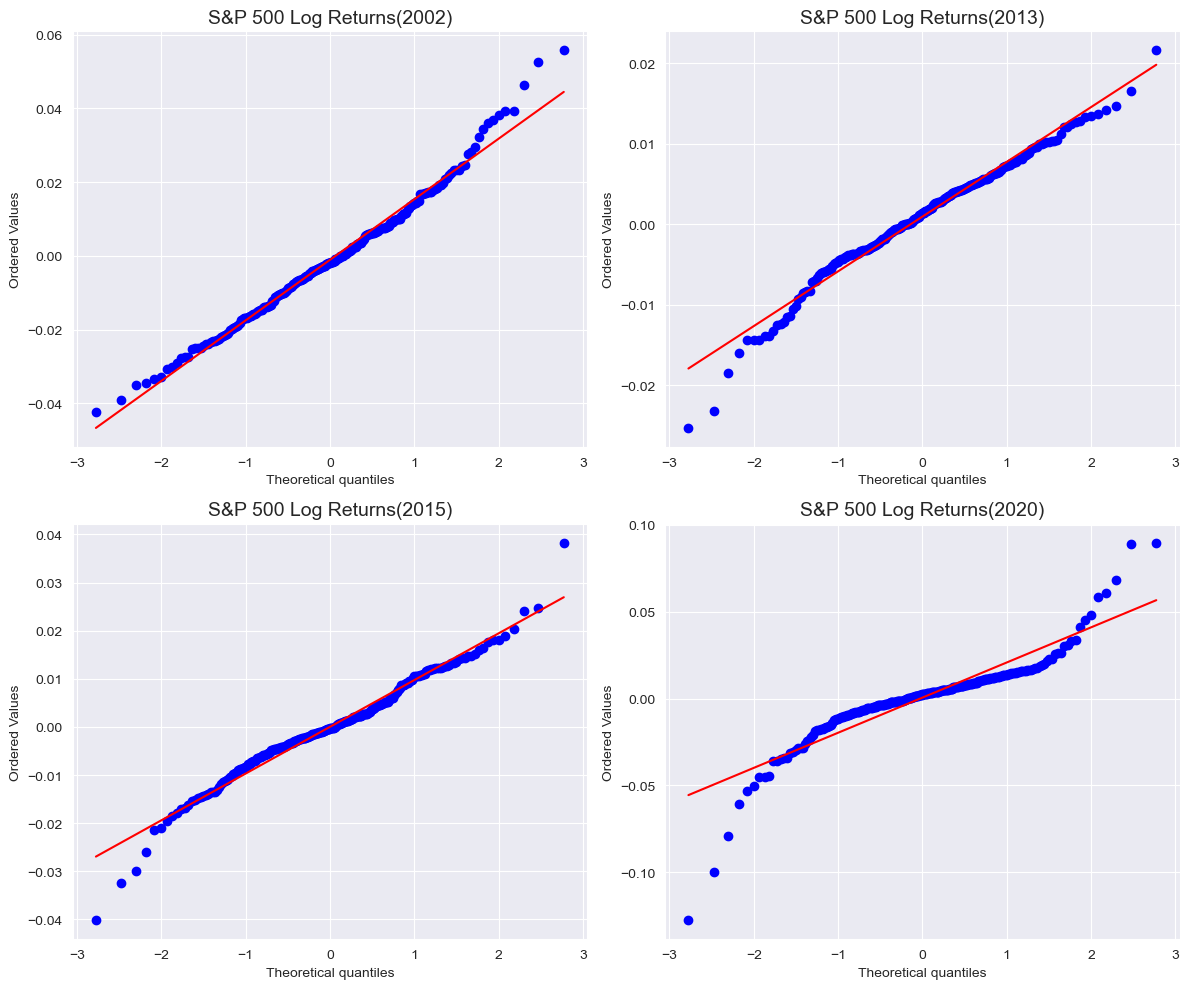

In [74]:
# Plot the distributions Q-Q plot for the four years

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False, sharey=False)

datasets = [
    (SP_logreturns_2002, "2002"),
    (SP_logreturns_2013, "2013"),
    (SP_logreturns_2015, "2015"),
    (SP_logreturns_2020, "2020")
]

axes_flat = axes.flatten()
for ax, (series, year) in zip(axes_flat, datasets):
    stats.probplot(series, dist="norm", plot=ax)
    ax.set_title(f"S&P 500 Log Returns({year})", fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [75]:
print(f"p values for years \n 2002 ::{p_2002:.4f} \n 2013 ::{p_2013:.4f} \n 2015 ::{p_2015:.4f} \n 2020 ::{p_2020:.4f}")


p values for years 
 2002 ::0.0039 
 2013 ::0.0001 
 2015 ::0.0003 
 2020 ::0.0000


While all of then show significant deviations from normal distrubution, the reasons for the deviation seems to be different in different years.

In 2002, the stock market recovered from the dot-com bubble. Here, we see that there are hardly any returns that show large negative return. But the deviation mostly comes from large positive returns. This could be because, overall the market showed more number of recovery days. Likely because the market had overreacted before this.

In 2013 and 2015, two years when there were no large-scale high impact global factors seem to show more typical behavior (I checked with other years, plots are not shown). While there is some deviation coming from large positive returns, most of the deviation seem to be coming from large negative returns.


In 2020, COVID pandemic caused a lot of disruption. So, we see that there are large negative returns. There also seems to be large positive returns in the year, indicating market showed high volatility with big ups and downs. Here, by "large", I mean values that are more extreme than expected in a normal distribution. 

Are the deviations only coming from extreme values?

We see that in all years 2002, 2013 and 2015, the central part of the distribution seems to be closely following a normal distribution.
However, in 2020 which is a highly volatile year, even the central part of the distribution seems to deviate from the normal distribution.

To make this more quantitative, I have removed the extreme 1% percent values from both sides and calculated the p values after trimming in the next section.



In [76]:
def trim_data(logreturns_data,alpha):
    low, high = np.quantile(logreturns_data, [alpha, 1 - alpha])
    trim_mask = (logreturns_data >= low) & (logreturns_data <= high)
    return(logreturns_data[trim_mask])

In [77]:
alpha = 0.01
SP_logreturns_2002_trim = trim_data(SP_logreturns_2002, alpha)
SP_logreturns_2013_trim = trim_data(SP_logreturns_2013, alpha)
SP_logreturns_2015_trim = trim_data(SP_logreturns_2015, alpha)
SP_logreturns_2020_trim = trim_data(SP_logreturns_2020, alpha)

ptrim_2002 = stats.normaltest(SP_logreturns_2002_trim)[1]
ptrim_2013 = stats.normaltest(SP_logreturns_2013_trim)[1]
ptrim_2015 = stats.normaltest(SP_logreturns_2015_trim)[1]
ptrim_2020 = stats.normaltest(SP_logreturns_2020_trim)[1]

In [78]:
print(f"p values for years after removing 1% of the extreme data from both sides")
print(f" 2002 ::{ptrim_2002:.4f} \n 2013 ::{ptrim_2013:.4f} \n 2015 ::{ptrim_2015:.4f} \n 2020 ::{ptrim_2020:.4f}")

p values for years after removing 1% of the extreme data from both sides
 2002 ::0.2135 
 2013 ::0.0874 
 2015 ::0.7646 
 2020 ::0.0000


We see that after removing 1% of the extreme data on both side years 2002, 2013, and 2015 show normal distribution (their p values are all greater than 0.05). However, 2020 still shows deviations from normal distribution.

From this we conclude that, while for some years removing the extreme values may make sure that the log returns follow normal distribution, in a highly volatile year this is not always the case. When volatility is high, the return distribution can remain non-normal even after removing the extreme values. 

## 3 Looking at a longer range than a day

In [80]:
# Download data for years 2002, 2013, 2015, 2020 and calculate p values
SP_logreturns_2002_wk = SP500_dat(2002, "1wk")
SP_logreturns_2013_wk = SP500_dat(2013, "1wk")
SP_logreturns_2015_wk = SP500_dat(2015, "1wk")
SP_logreturns_2020_wk = SP500_dat(2020, "1wk")

p_2002_wk = stats.normaltest(SP_logreturns_2002_wk)[1]
p_2013_wk = stats.normaltest(SP_logreturns_2013_wk)[1]
p_2015_wk = stats.normaltest(SP_logreturns_2015_wk)[1]
p_2020_wk = stats.normaltest(SP_logreturns_2020_wk)[1]



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


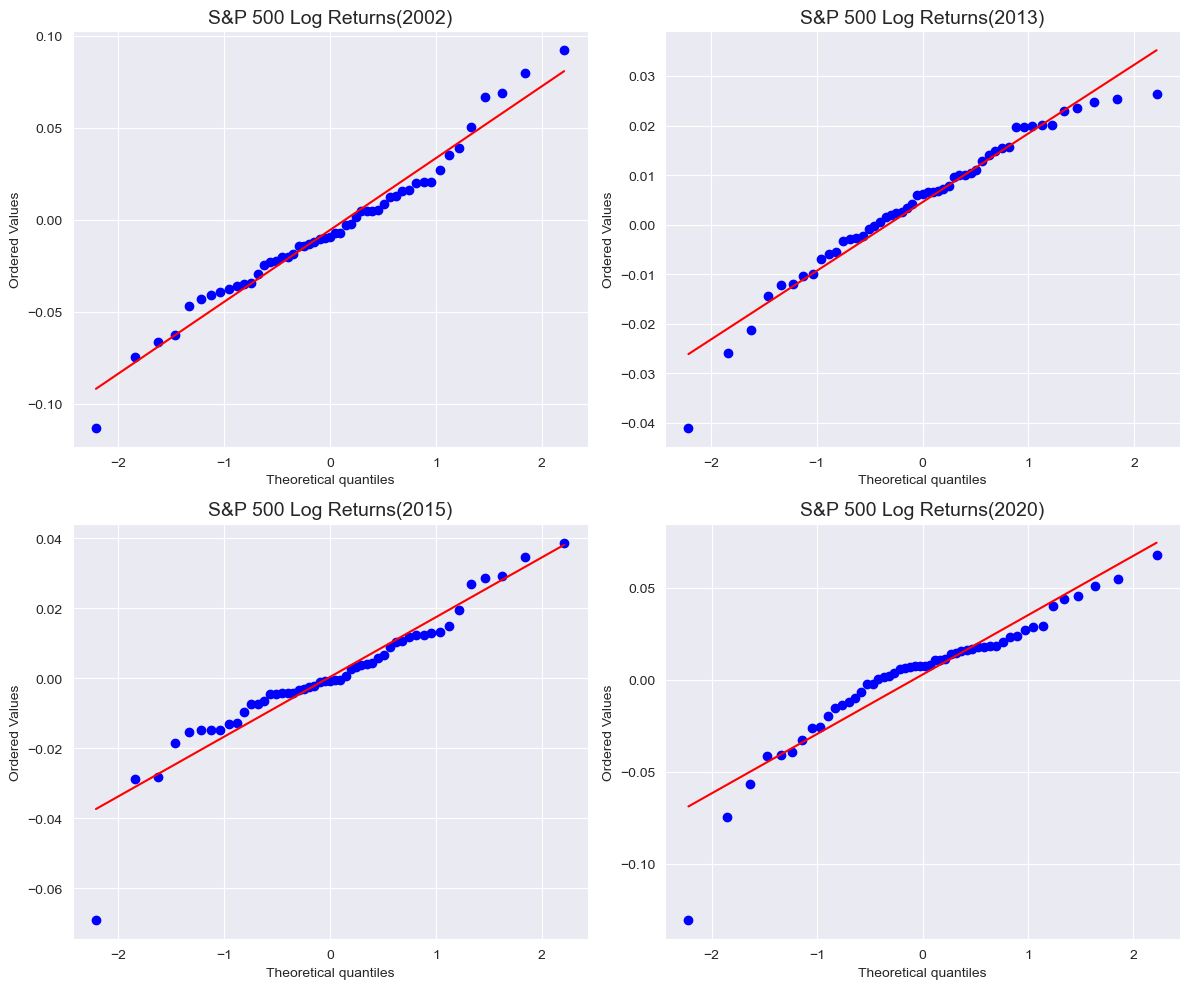

In [81]:
# Plot the distributions Q-Q plot for the four years

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=False, sharey=False)

datasets = [
    (SP_logreturns_2002_wk, "2002"),
    (SP_logreturns_2013_wk, "2013"),
    (SP_logreturns_2015_wk, "2015"),
    (SP_logreturns_2020_wk, "2020")
]

axes_flat = axes.flatten()
for ax, (series, year) in zip(axes_flat, datasets):
    stats.probplot(series, dist="norm", plot=ax)
    ax.set_title(f"S&P 500 Log Returns({year})", fontsize=14)
    ax.grid(True)

plt.tight_layout()
plt.show()

Here, I examined what happens if we look at a larger time window than 1 day. We might expect that 1 week returns are less volatile than 1 day returns, so if we look at 1 week returns the distribution is closer to normal distribution. We see that this is partially true as 2002 and 2013 data show that weekly returns are normally distributed. However, 2015 and 2020 data still show deviations from normal distribution. Therefore, we conclude that while considering larger time window might be of some help, it does not always work if the distribution is highly volatile. So it is not a guarenteed way to make the distribution look normal.

## 4 Effect of Sectors

Some sectors are more stable than other sectors. So, to see if we observe any marked difference in the distribution of returns in different sectors, I have looked at the data for different sectors using sector ETFs. The market is typically divided into 11 sectors. I have restricted to 9 of them, for which data was available for the past 10 years. Below, I have plotted a histogram showing the number of years where the return is normally distributed for different sectors.

In [203]:
def sector_dat(sector_ind):
    years = range(2015, 2024)
    psect_values = []

    for yr in years:
        sect_index = yf.download(sector_ind, start = f"{yr}-01-01", end = f"{yr}-12-31", interval = '1d', auto_adjust=True,progress=False)
        sect_returns = sect_index['Close']/sect_index['Close'].shift(1)
        sect_logreturns = np.log(sect_returns.dropna())[sector_ind].values
        # p value from D'Agostino and Pearson’s tes
        p_sect = stats.normaltest(sect_logreturns)[1]
        psect_values.append(p_sect)
    return(np.sum(np.array(psect_values) > 0.05) )



In [199]:
sector_tickers = {
    "XLY": "Consumer Discretionary",
    "XLP": "Consumer Staples",
    "XLE": "Energy",
    "XLF": "Financials",
    "XLV": "Health Care",
    "XLI": "Industrials",
    "XLK": "Information Technology",
    "XLB": "Materials",
    "XLU": "Utilities",
    "^GSPC": "S&P 500"
}



In [201]:
counts = {}
for ticker, name in sector_tickers.items():
    counts[name] = sector_dat(ticker)


labels  = list(counts.keys())
values  = [counts[label] for label in labels]

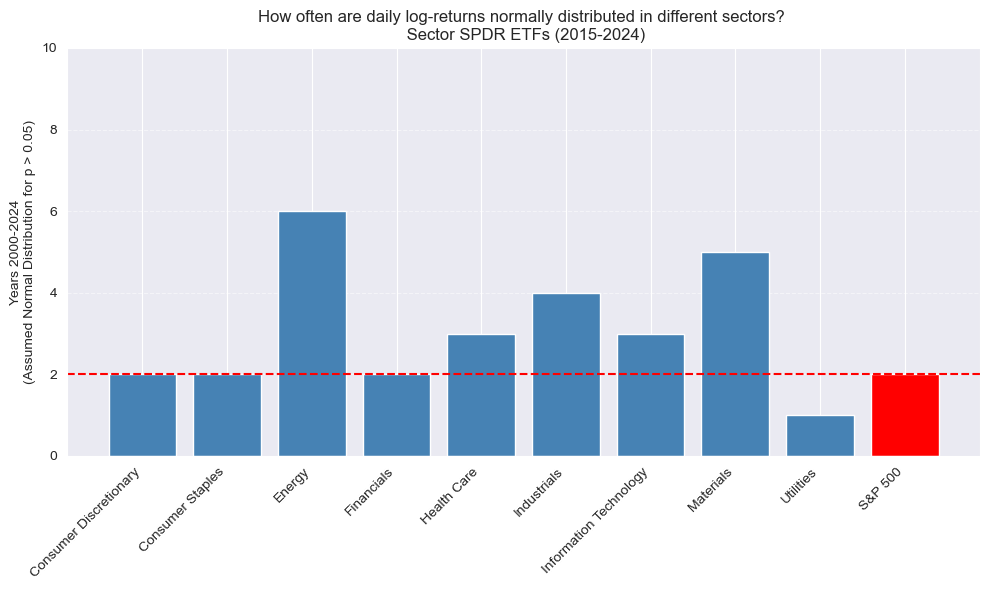

In [208]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["red" if lab == "S&P 500" else "steelblue" for lab in labels]
ax.bar(labels, values, color=colors)
ax.set_ylabel("Years 2000-2024\n(Assumed Normal Distribution for p > 0.05)")
ax.set_title("How often are daily log-returns normally distributed in different sectors? \n Sector SPDR ETFs (2015-2024)")
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")  
ax.set_ylim(0, 10)                                    
ax.grid(axis="y", ls="--", alpha=0.5)
ax.axhline(y=2,color='red', linestyle = "--")
plt.tight_layout()
plt.show()

For comparison, I have also included S&P 500, which has representation from all sectors weighted according to their size. We see that only 2 out 10 years S&P 500 has shown normal distribution! 

While it is hard to draw rigorous conclusions from limited data using an imprecise indicator like the number of years where we see normal distribution, we still see two outliers. Energy and Materials sector seem to be lot more stable than other sectors. Whereas Utilities sector seems the most unstable.
